<a href="https://colab.research.google.com/github/chethana20050/Data-Analytics-/blob/main/Classification_of_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Workshop dataset/flowers/training'  # path to unzipped folder
selected_classes = ['daisy','dandelion', 'rose']
img_size = (128, 128)
batch_size = 32

In [ ]:
def filter_classes(data_dir, selected_classes):
    all_classes = os.listdir(data_dir)
    for class_name in all_classes:
        if class_name not in selected_classes:
            path_to_delete = os.path.join(data_dir, class_name)
            if os.path.isdir(path_to_delete):
                os.system(f"rm -rf \"{path_to_delete}\"")  # Linux/macOS
                # For Windows use: shutil.rmtree(path_to_delete)

filter_classes(data_dir, selected_classes)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2073 images belonging to 3 classes.
Found 517 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2}

In [ ]:
data, label = next(train_generator)

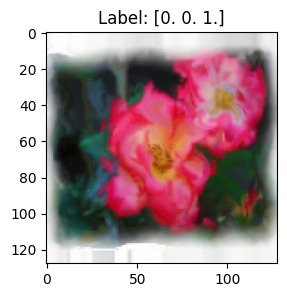

In [ ]:

plt.figure(figsize=(3,3))
plt.imshow(data[20])   # from 32 images take first image
plt.title(f"Label: {label[20]}") #take label of first image & show it as title of image
plt.show()

In [ ]:
model = models.Sequential([
    layers.Input(shape=(*img_size, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(selected_classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.4598 - loss: 1.0419 - val_accuracy: 0.5957 - val_loss: 0.8062
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6647 - loss: 0.8280 - val_accuracy: 0.7447 - val_loss: 0.6505
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7275 - loss: 0.6959 - val_accuracy: 0.7176 - val_loss: 0.7115
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7342 - loss: 0.6716 - val_accuracy: 0.7737 - val_loss: 0.6048
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7610 - loss: 0.6058 - val_accuracy: 0.7853 - val_loss: 0.5353


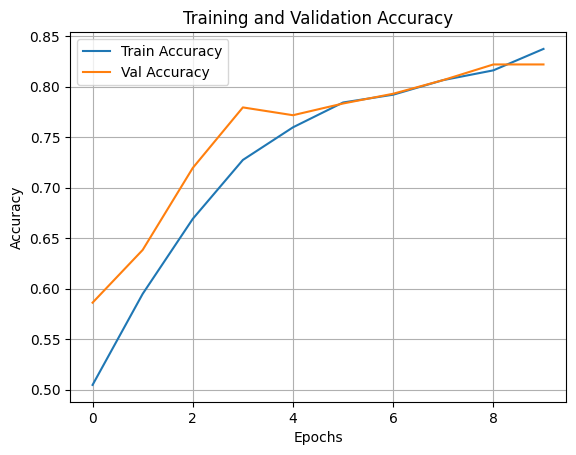

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


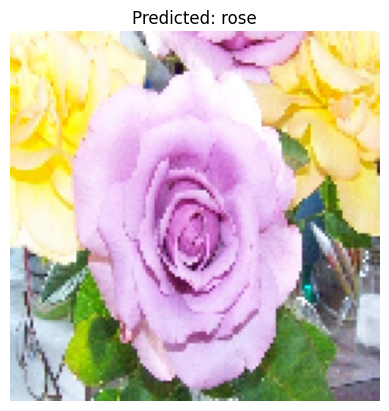

In [ ]:
# import tensorflow as tf
# import numpy as np
from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# Set image path
img_path = '/content/drive/MyDrive/Workshop dataset/flowers/New samples/rose3.jpg'  # replace with your image path
img_size = (128, 128)       # must match your training image size

# Load and preprocess the image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict using the model
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])

# Map index to class label
class_names = list(train_generator.class_indices.keys())
predicted_class = class_names[predicted_class_index]

# Show result
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
